In [1]:
import pandas as pd # for data manipulation and analysis
# for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the file
dt=pd.read_csv('50_Startups.csv')

In [3]:
dt.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#checking the shape of the dataset
dt.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
#checking the null values.
dt.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [6]:
# droping the null values
dt[dt['R&D Spend'].isna()]
dt=dt.dropna()
dt=dt.reset_index(drop=True)

In [7]:
# checking the shape of the data
dt.shape

(46, 5)

In [8]:
# corelation of the data
dt.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.196068,0.708253,0.977703
Administration,0.196068,1.000000,-0.085831,0.135076
Marketing Spend,0.708253,-0.085831,1.000000,0.732277
Profit,0.977703,0.135076,0.732277,1.000000


In [9]:
# checking the null values after droping the null values.
dt.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
#  encode the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
State=le.fit_transform(dt['State'])
dt['State']=State

In [11]:
# checking the datatypes after encoding the data.
dt.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                int32
Profit             float64
dtype: object

In [12]:
# Seprating the datset with independent and dependent variables and assinging to the x and y variables
x=dt.iloc[:,0:-1]
y=dt['Profit']

In [13]:
# Spliting the dataset in the form train and test, for the purpose of training and testing of the model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
# Fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [15]:
#finding the coefficient of all the independent variables.
coeff_df=pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.768780
Administration,-0.039898
Marketing Spend,0.020199
State,-432.371932


In [16]:
# finding the intercept
regressor.intercept_

57936.506980300495

In [17]:
# predicting the model.
y_pred=regressor.predict(xtest)

In [18]:
# Finding the residual sum of square.
print("Residual sum of square :%0.2f"%((y_pred-ytest)**2).sum())

Residual sum of square :313832609.04


In [19]:
# finding the accuracy of the model.
regressor.score(x,y)

0.9607601435429819

In [20]:
# creating the list of all the independent variables.
feature_names=list(x.columns.values)

In [21]:
# checking the summary of the model.
from regressors import stats 
stats.summary(regressor,x,y,feature_names)

Residuals:
        Min         1Q     Median         3Q         Max
-12174.7205 -5128.1289  2365.7972  4816.5691  16046.7797


Coefficients:
                     Estimate   Std. Error  t value   p value
_intercept       57936.506980  5739.120113  10.0950  0.000000
R&D Spend            0.768780     0.034140  22.5183  0.000000
Administration      -0.039898     0.016861  -2.3662  0.022336
Marketing Spend      0.020199     0.008269   2.4427  0.018568
State             -432.371932  1292.195225  -0.3346  0.739479
---
R-squared:  0.96076,    Adjusted R-squared:  0.95693
F-statistic: 250.96 on 4 features


In [22]:
# the p value of the state variable is greater then 0.05 so we are going to drop the variable.

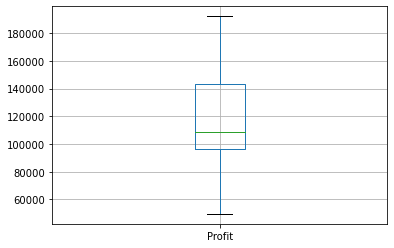

In [23]:
# ploting the boxplot to check the outliers.
dt.boxplot(['Profit'])

In [24]:
# droping the independent variable which has less significant to dependent variable.
x=dt[['R&D Spend','Administration','Marketing Spend']]
y=dt['Profit']

In [25]:
# Spliting the dataset in the form train and test, for the purpose of training and testing of the model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
# Fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [27]:
#finding the coefficient of all the independent variables.
coeff_df=pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.768169
Administration,-0.039212
Marketing Spend,0.020082


In [28]:
# find the intercept
regressor.intercept_

57494.81491224032

In [29]:
# predicting the model
y_pred=regressor.predict(xtest)

In [30]:
# Finding the residual sum of square.
print("Residual sum of square :%0.2f"%((y_pred-ytest)**2).sum())

Residual sum of square :325678877.53


In [31]:
# finding the accuracy of the model.
regressor.score(x,y)

0.9604740314289811

In [32]:
# creating the list of all the independent variables.
feature_names=list(x.columns.values)

In [33]:
# checking the summary of the model.
stats.summary(regressor,x,y,feature_names)

Residuals:
        Min         1Q     Median         3Q         Max
-12137.8574 -5287.4812  2542.9658  4775.8333  16041.6204


Coefficients:
                     Estimate   Std. Error  t value   p value
_intercept       57494.814912  5723.487218  10.0454  0.000000
R&D Spend            0.768169     0.034264  22.4188  0.000000
Administration      -0.039212     0.016923  -2.3171  0.025106
Marketing Spend      0.020082     0.008299   2.4198  0.019632
---
R-squared:  0.96047,    Adjusted R-squared:  0.95765
F-statistic: 340.20 on 3 features
